# Sensitivity Analaysis

In this file SOBOL will be used to see how all uncertainties effect the 3 chosen policies.



## 1. SOBOL
1. Import results

In [2]:
from ema_workbench import load_results
import matplotlib.pyplot as plt

# Load results
results = load_results('dike_open_exploration_results.tar.gz')
experiments, outcomes = results

# Metadata
columns_to_drop = [
    'scenario', 'policy', 'model'
]

# New cleaned dataframe
cleaned_experiments = experiments.drop(columns=columns_to_drop)

In [3]:
# Show dataframe
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
0,120,258.586586,10.0,0.153032,335.246128,1.5,0.512826,254.019441,1.5,0.457289,...,3,0,3,5,1,0,4,1,8,3
1,113,194.568728,10.0,0.293827,255.509874,10.0,0.068949,49.174779,1.5,0.544252,...,3,0,3,5,1,0,4,1,8,3
2,61,91.891624,10.0,0.693707,119.755578,1.5,0.738327,268.405931,1.0,0.673490,...,3,0,3,5,1,0,4,1,8,3
3,37,202.480358,1.0,0.190247,291.386916,1.0,0.796584,310.859423,1.0,0.472770,...,3,0,3,5,1,0,4,1,8,3
4,72,107.315104,1.5,0.891560,161.090764,1.0,0.663633,282.442271,10.0,0.736509,...,3,0,3,5,1,0,4,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274995,11,36.472636,10.0,0.861548,311.634628,1.0,0.406204,94.075970,1.0,0.267837,...,2,10,6,4,7,9,8,5,6,3
274996,83,114.609975,1.0,0.701080,236.826590,1.5,0.384472,229.176558,1.5,0.279916,...,2,10,6,4,7,9,8,5,6,3
274997,117,209.328350,1.0,0.152388,30.133378,1.5,0.511698,117.241683,1.5,0.292723,...,2,10,6,4,7,9,8,5,6,3
274998,120,55.912132,10.0,0.471526,219.754121,1.5,0.190638,307.120528,1.5,0.020785,...,2,10,6,4,7,9,8,5,6,3


In [4]:
import pandas as pd
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,1.081249e+06,929900000.0,4.791422e+08
1,2.129495e+07,929900000.0,4.791422e+08
2,0.000000e+00,929900000.0,4.791422e+08
3,3.178760e+06,929900000.0,4.791422e+08
4,0.000000e+00,929900000.0,4.791422e+08
...,...,...,...
274995,1.490598e+06,946900000.0,3.807868e+08
274996,5.543433e+06,946900000.0,3.807868e+08
274997,2.508874e+06,946900000.0,3.807868e+08
274998,1.373289e+08,946900000.0,3.807868e+08


In [5]:
# Join outcomes with experiments
tot = experiments.join(outcomes_pd)

# Filter the minimal costs
filtered = tot[tot['RfR Total Costs'] >= 1000000000]

# Group by policy en take the mean
tot_policy = filtered.groupby('policy').mean(numeric_only=True)

# Sort the policies in ascending way
tot_policy.sort_values(
    by=['RfR Total Costs', 'Dike Investment Costs', 'Expected Annual Damage'],
    ascending=[True, True, True],
    inplace=True
)

# Look at results
tot_policy


/var/folders/lb/g5qxb3zn2251k9x96gdsdvdw0000gn/T/ipykernel_12012/3993853072.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = filtered.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
policy,,,,,,,,,,,,,,,,,,,,,
108,65.996,189.998617,0.499997,190.001099,0.500006,189.990866,0.500005,189.997061,0.499995,190.000082,...,8.0,7.0,5.0,4.0,4.0,1.0,3.0,3.897000e+07,1.005200e+09,2.849550e+08
124,65.996,189.998617,0.499997,190.001099,0.500006,189.990866,0.500005,189.997061,0.499995,190.000082,...,6.0,10.0,7.0,6.0,5.0,0.0,0.0,1.569950e+07,1.006900e+09,3.658823e+08
82,65.996,189.998617,0.499997,190.001099,0.500006,189.990866,0.500005,189.997061,0.499995,190.000082,...,6.0,4.0,3.0,10.0,7.0,7.0,0.0,1.488894e+07,1.010700e+09,5.541308e+08
69,65.996,189.998617,0.499997,190.001099,0.500006,189.990866,0.500005,189.997061,0.499995,190.000082,...,2.0,3.0,3.0,9.0,8.0,2.0,2.0,1.340628e+07,1.011100e+09,5.647679e+08
160,65.996,189.998617,0.499997,190.001099,0.500006,189.990866,0.500005,189.997061,0.499995,190.000082,...,5.0,8.0,6.0,3.0,2.0,7.0,3.0,1.210550e+07,1.012800e+09,4.284028e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
top3_policy_names = tot_policy.index[:3].tolist()
top3_policy_names

[108, 124, 82]

In [7]:
lever_columns = [
    '0_RfR 0', '0_RfR 1', '0_RfR 2',
    '1_RfR 0', '1_RfR 1', '1_RfR 2',
    '2_RfR 0', '2_RfR 1', '2_RfR 2',
    '3_RfR 0', '3_RfR 1', '3_RfR 2',
    '4_RfR 0', '4_RfR 1', '4_RfR 2',
    'EWS_DaysToThreat',
    'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
    'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
    'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
    'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
    'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2'
]

In [8]:
from ema_workbench import Policy

# Select top 3 rows.
top3_df = tot_policy.iloc[:3]

# Select all columns that are levers
lever_columns = [col for col in top3_df.columns if col in  lever_columns]

# Make dictionary per policy
top3_policies = []
for idx, row in top3_df.iterrows():
    lever_dict = {col: row[col] for col in lever_columns}
    policy = Policy(str(idx), **lever_dict)
    top3_policies.append(policy)

top3_policies

[Policy({'0_RfR 0': 0.0, '0_RfR 1': 1.0, '0_RfR 2': 1.0, '1_RfR 0': 1.0, '1_RfR 1': 1.0, '1_RfR 2': 1.0, '2_RfR 0': 1.0, '2_RfR 1': 1.0, '2_RfR 2': 0.0, '3_RfR 0': 1.0, '3_RfR 1': 0.0, '3_RfR 2': 0.0, '4_RfR 0': 0.0, '4_RfR 1': 0.0, '4_RfR 2': 0.0, 'A.1_DikeIncrease 0': 1.0, 'A.1_DikeIncrease 1': 0.0, 'A.1_DikeIncrease 2': 4.0, 'A.2_DikeIncrease 0': 1.0, 'A.2_DikeIncrease 1': 2.0, 'A.2_DikeIncrease 2': 0.0, 'A.3_DikeIncrease 0': 9.0, 'A.3_DikeIncrease 1': 1.0, 'A.3_DikeIncrease 2': 8.0, 'A.4_DikeIncrease 0': 8.0, 'A.4_DikeIncrease 1': 7.0, 'A.4_DikeIncrease 2': 5.0, 'A.5_DikeIncrease 0': 4.0, 'A.5_DikeIncrease 1': 4.0, 'A.5_DikeIncrease 2': 1.0, 'EWS_DaysToThreat': 3.0}),
 Policy({'0_RfR 0': 1.0, '0_RfR 1': 1.0, '0_RfR 2': 1.0, '1_RfR 0': 1.0, '1_RfR 1': 0.0, '1_RfR 2': 1.0, '2_RfR 0': 1.0, '2_RfR 1': 0.0, '2_RfR 2': 1.0, '3_RfR 0': 0.0, '3_RfR 1': 0.0, '3_RfR 2': 0.0, '4_RfR 0': 1.0, '4_RfR 1': 0.0, '4_RfR 2': 0.0, 'A.1_DikeIncrease 0': 1.0, 'A.1_DikeIncrease 1': 9.0, 'A.1_DikeIncreas

2. Import model

In [9]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

ema_logging.log_to_stderr(ema_logging.INFO)

# 0: is our problem formulation (Veluwe); 1: different problem formulation with 2 kinds of costs together for Veluwe.
# 2: problem formulation Zutphen, 3: problem formulation Doesburg & Cortenoever; 4: problem formulation Overijssel
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [10]:
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem

ema_logging.log_to_stderr(ema_logging.INFO)

# Process the model
with MultiprocessingEvaluator(dike_model, n_processes=-2) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(128, top3_policies,
                                                         uncertainty_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 5120 scenarios * 3 policies * 1 model(s) = 15360 experiments
100%|████████████████████████████████████| 15360/15360 [05:00<00:00, 51.10it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


3. Sensitivity indexes

We will create a sensitivity index plot, displaying the S1 (First-order), S2 (Second-order), and ST (Total-order) sensitivity indexes, to compare the influence of input parameters on the reliability objective across three release policies. This will provide insights into the importance of different uncertainties under each policy.

In [11]:
from SALib.analyze.sobol import analyze
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import seaborn as sns

# Define the problem
problem = get_SALib_problem(dike_model.uncertainties)

#### 1. RFR Total Cost

In [12]:
# # Define the problem
# problem = get_SALib_problem(dike_model.uncertainties)
#
# Si_rfr = sobol.analyze(problem, outcomes['RfR Total Costs'], calc_second_order=True, print_to_console=False)
#
# scores_filtered = {k: Si_rfr[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
# Si_df_rfr = pd.DataFrame(scores_filtered, index=problem["names"])
#
# sns.set_style("white")
# fig, ax = plt.subplots(1)
#
# indices = Si_df_rfr[["S1", "ST"]]
# err = Si_df_rfr[["S1_conf", "ST_conf"]]
#
# indices.plot.bar(yerr=err.values.T, ax=ax)
# fig.set_size_inches(8, 6)
# fig.subplots_adjust(bottom=0.3)
# plt.show()

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


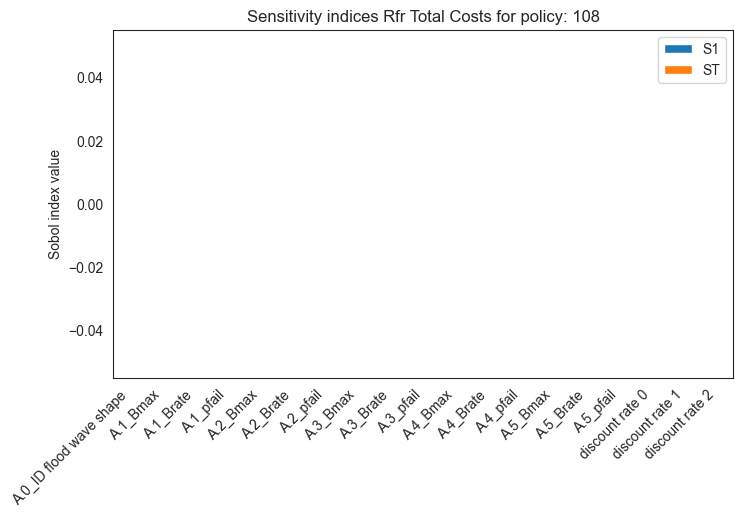

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


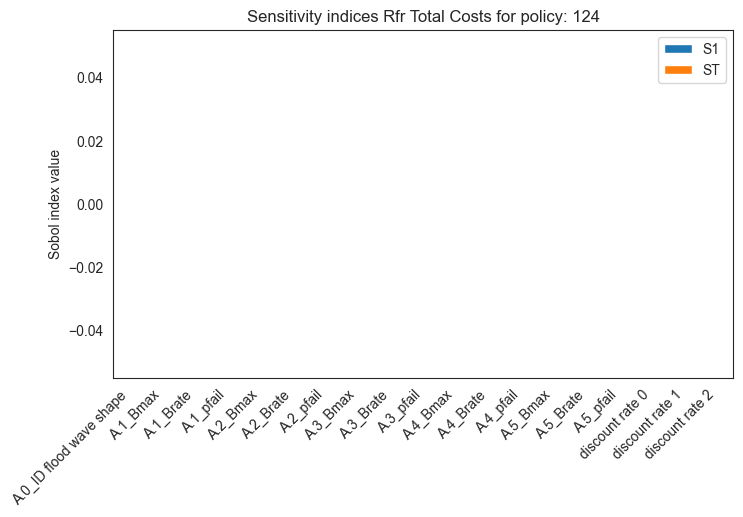

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


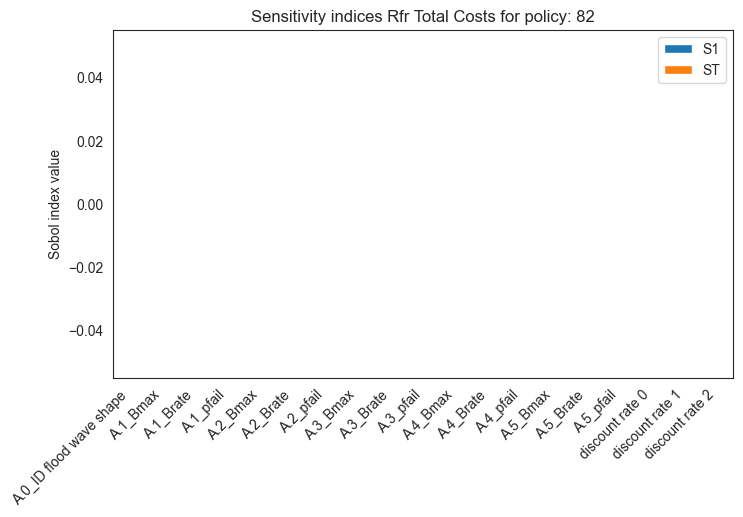

In [13]:
sobol_results = {}

# Loop over top policies and compute Sobol indices
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)
    y = outcomes['RfR Total Costs'][logical]

    # Run Sobol analysis
    Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=False)
    sobol_results[str(policy)] = Si

    # Filter and structure the results
    scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
    Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

    # Plot
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    indices = Si_df[["S1", "ST"]]
    errors = Si_df[["S1_conf", "ST_conf"]]

    indices.plot.bar(yerr=errors.values.T, ax=ax, capsize=4)
    ax.set_title(f"Sensitivity indices Rfr Total Costs for policy: {policy}")
    ax.set_ylabel("Sobol index value")
    ax.set_xticklabels(Si_df.index, rotation=45, ha='right')
    fig.subplots_adjust(bottom=0.3)
    plt.show()

In [14]:
# from SALib.analyze.sobol import analyze
#
# print(top3_policy_names)
#
# sobol_results = {}
# for policy in top3_policy_names:
#     logical = experiments.policy == str(policy)
#     y = outcomes['RfR Total Costs'][logical]
#     indices = analyze(problem, y)
#     sobol_results[str(policy)] = indices
#
# for policy in sobol_results:
#     fig, axes = plt.subplots(1, 3)
#     fig.set_size_inches(8, 4)
#     sobol_results[policy].plot(ax=axes)
#     plt.suptitle(f'Sensitivity - policy {policy}')

#### 2. Expected Annual Damage


In [15]:
# Si_damage = sobol.analyze(problem, outcomes['Expected Annual Damage'], calc_second_order=True, print_to_console=False)
#
# scores_filtered = {k: Si_damage[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
# Si_df_damage = pd.DataFrame(scores_filtered, index=problem["names"])
#
# sns.set_style("white")
# fig, ax = plt.subplots(1)
#
# indices = Si_df_damage[["S1", "ST"]]
# err = Si_df_damage[["S1_conf", "ST_conf"]]
#
# indices.plot.bar(yerr=err.values.T, ax=ax)
# fig.set_size_inches(8, 6)
# fig.subplots_adjust(bottom=0.3)
# ax.set_title("Sobol Sensitivity – Expected Annual Damage")
# plt.show()


/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


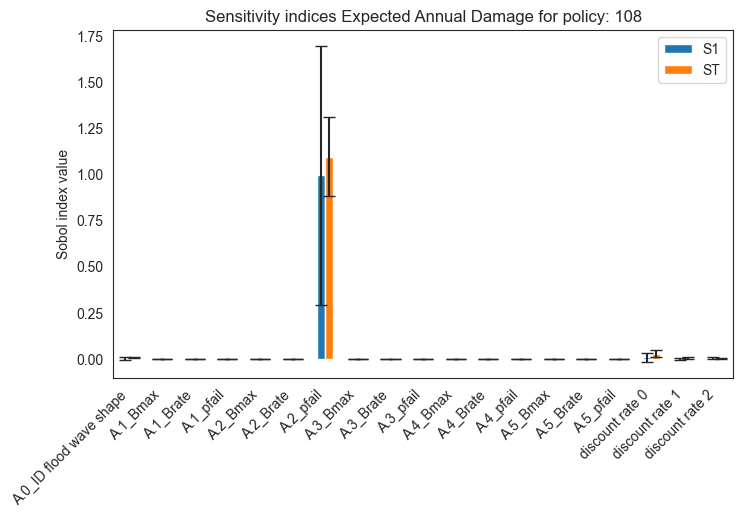

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


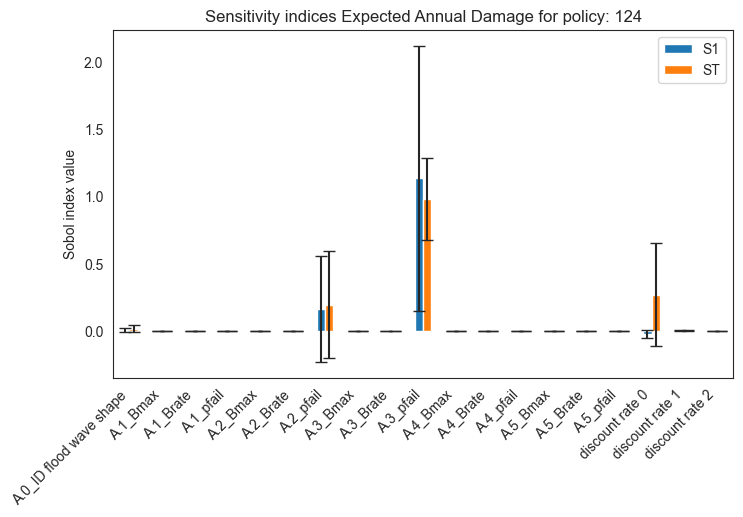

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


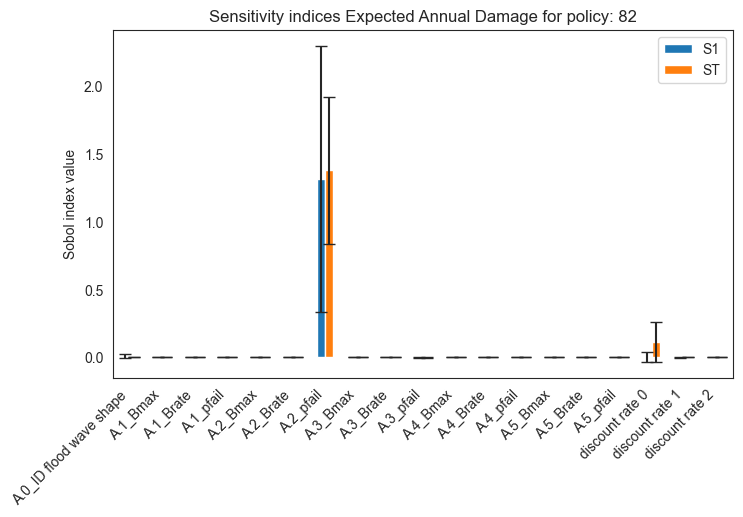

In [16]:
sobol_results = {}

# Loop over top policies and compute Sobol indices
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)
    y = outcomes['Expected Annual Damage'][logical]

    # Run Sobol analysis
    Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=False)
    sobol_results[str(policy)] = Si

    # Filter and structure the results
    scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
    Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

    # Plot
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    indices = Si_df[["S1", "ST"]]
    errors = Si_df[["S1_conf", "ST_conf"]]

    indices.plot.bar(yerr=errors.values.T, ax=ax, capsize=4)
    ax.set_title(f"Sensitivity indices Expected Annual Damage for policy: {policy}")
    ax.set_ylabel("Sobol index value")
    ax.set_xticklabels(Si_df.index, rotation=45, ha='right')
    fig.subplots_adjust(bottom=0.3)
    plt.show()

#### 3. Dike Investment Costs

In [17]:
# Si_dike = sobol.analyze(problem, outcomes['Dike Investment Costs'], calc_second_order=True, print_to_console=False)
#
# scores_filtered = {k: Si_dike[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
# Si_df_dike = pd.DataFrame(scores_filtered, index=problem["names"])
#
# sns.set_style("white")
# fig, ax = plt.subplots(1)
#
# indices = Si_df_dike[["S1", "ST"]]
# err = Si_df_dike[["S1_conf", "ST_conf"]]
#
# indices.plot.bar(yerr=err.values.T, ax=ax)
# fig.set_size_inches(8, 6)
# fig.subplots_adjust(bottom=0.3)
# ax.set_title("Sobol Sensitivity – Dike Investment Costs")
# plt.show()

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:216: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:229: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:239: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produce

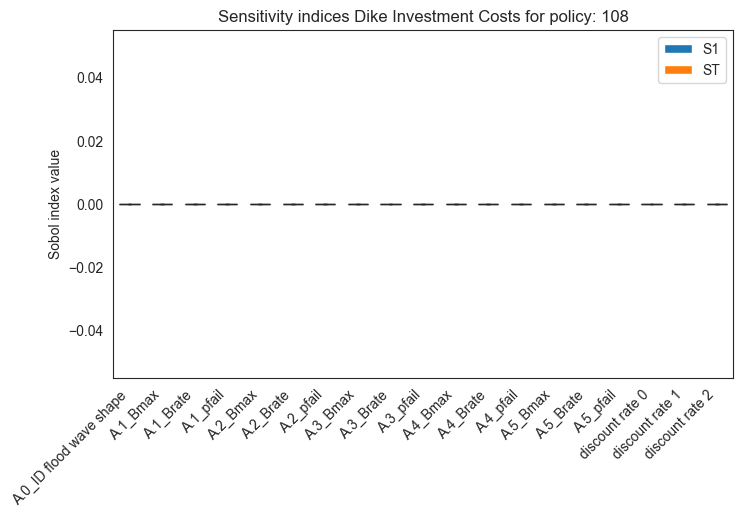

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:216: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:229: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produced identical values.
  warn(CONST_RESULT_MSG)
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:239: UserWarning: Constant values encountered, indicating model evaluations (or subset of evaluations) produce

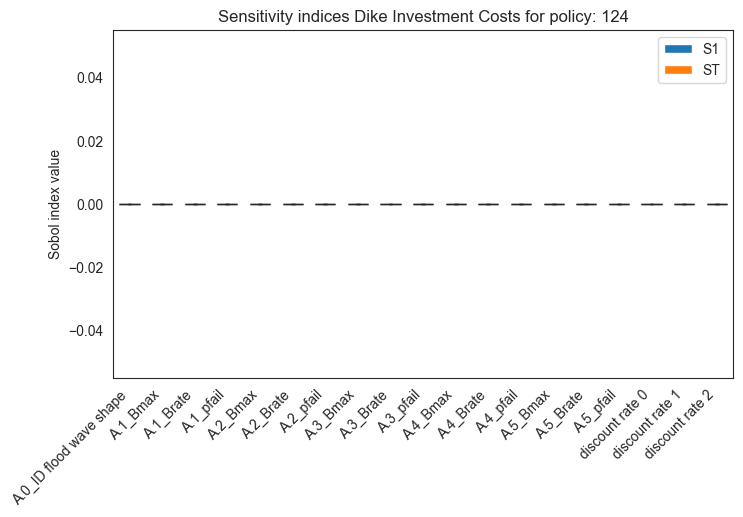

/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/romyhuizer/Downloads/EPA133a-Lab/.venv/lib/python3.11/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


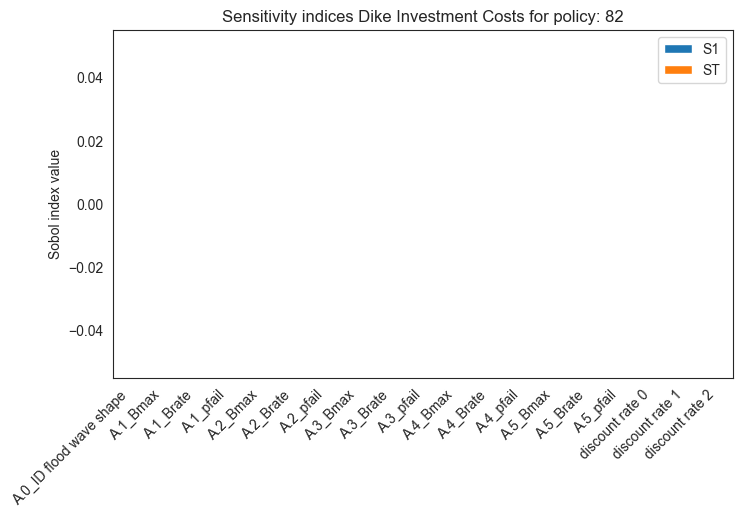

In [18]:
sobol_results = {}

# Loop over top policies and compute Sobol indices
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)
    y = outcomes['Dike Investment Costs'][logical]

    # Run Sobol analysis
    Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=False)
    sobol_results[str(policy)] = Si

    # Filter and structure the results
    scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
    Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

    # Plot
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    indices = Si_df[["S1", "ST"]]
    errors = Si_df[["S1_conf", "ST_conf"]]

    indices.plot.bar(yerr=errors.values.T, ax=ax, capsize=4)
    ax.set_title(f"Sensitivity indices Dike Investment Costs for policy: {policy}")
    ax.set_ylabel("Sobol index value")
    ax.set_xticklabels(Si_df.index, rotation=45, ha='right')
    fig.subplots_adjust(bottom=0.3)
    plt.show()

The above figure shows side by side the total order (ST), first order (S1), and second order (S2) effects as estimated by Sobol. The black bars indicate the error bars for each estimated effect. We can see that sensitivity is driven by B and Q with a small role also for the mean. Most of the effect is due to S1 with only a small role for some interaction effect (i.e., S2) between b and q.

## 2. Feature scoring
Repeat the above analysis for the 3 release policies but now with extra trees [feature scoring](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/feature_scoring.html) and for all outcomes of interest. As a bonus, use the sobol experiment results as input for extra trees, and compare the results with those resulting from latin hypercube sampling.

*hint: you can use [seaborn heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for a nice figure of the results. See also the [features scoring](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html#feature-scoring) section of the tutorial.*

Feature scoring is a machine learning-based technique for global sensitivity analysis that ranks input parameters (uncertainties) based on their importance in determining the model's outputs. It is useful because it provides an alternative approach to understanding the influence of different parameters on the model outcomes, often with less computational cost.

In this section, we will apply extra trees feature scoring to the lake problem for all outcomes of interest and analyze the results under the three release policies. We will use the Sobol experiment results as input for extra trees and compare the outcomes with those obtained from Latin Hypercube Sampling. To visualize the results, we will create a series of heatmaps using seaborn, displaying the feature importances for each policy.

In [19]:
from ema_workbench.analysis import feature_scoring

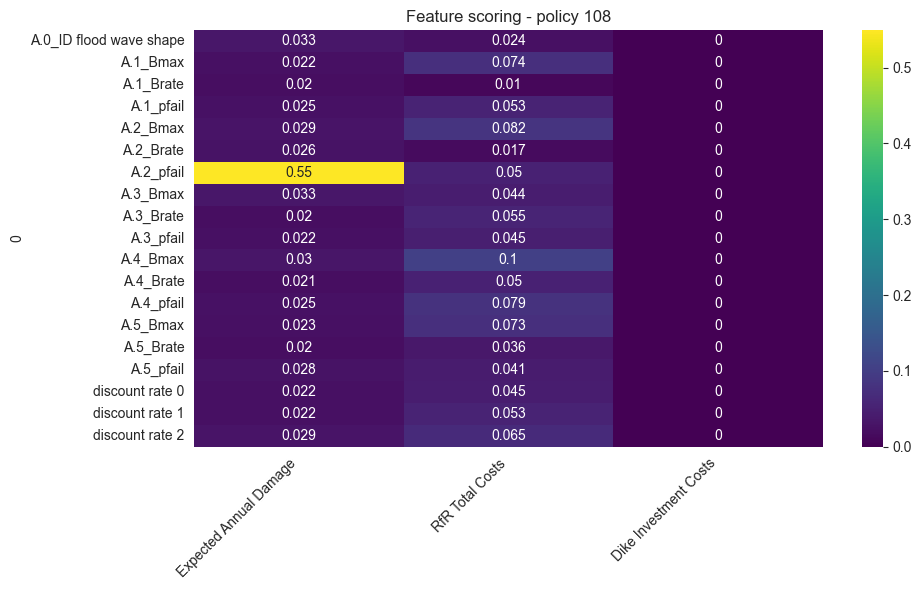

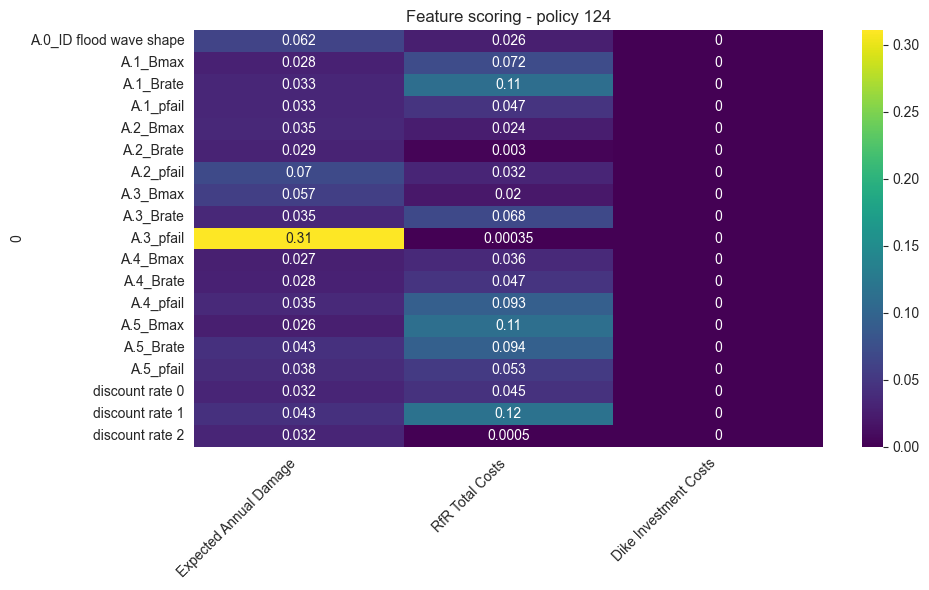

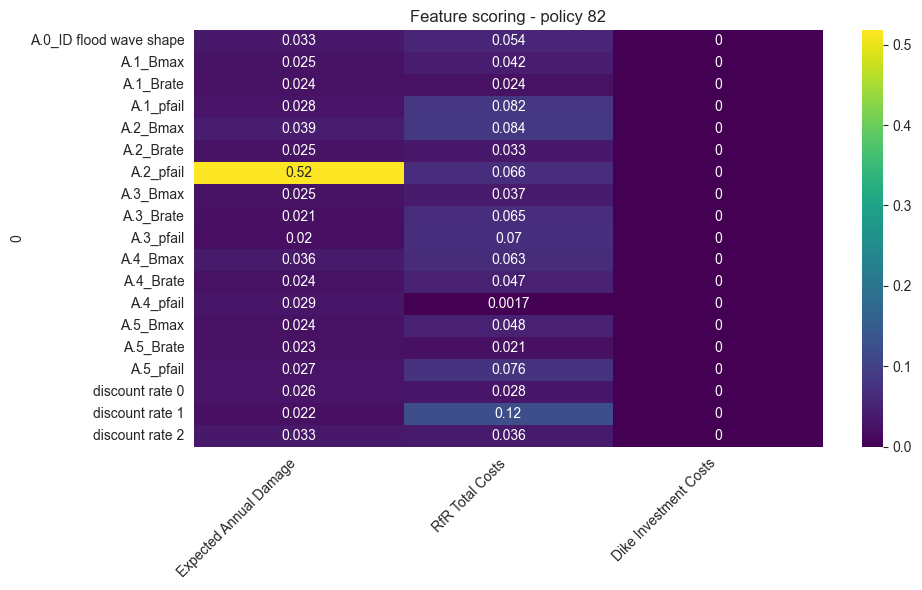

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring

# Drop levers from experiments
cleaned_experiments = experiments.drop(columns=[l.name for l in dike_model.levers])

# Loop only through top 3 policies
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)

    # Subset results for current policy
    subset_results = {k: v[logical] for k, v in outcomes.items()}

    # Feature scoring
    scores = feature_scoring.get_feature_scores_all(
        cleaned_experiments[logical],
        subset_results
    )

    # Heatmap plot
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, cmap='viridis')
    plt.title(f"Feature scoring - policy {policy}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [21]:
# top3_policy_names = tot_policy.index[:3].tolist()
# type(top3_policy_names[0])

In [22]:
# experiments.policy.unique()

In [23]:
# type(results)

In [24]:
# experiments, outcomes_dict = results

In [25]:
# for policy in experiments.policy.unique():
#     if policy in top3_policy_names:
#         logical = experiments.policy == policy
#         #subset_results = {k:v[logical] for k,v in results.items()}
#         subset_results = {k:v[logical] for k,v in outcomes_dict.items()}
#         scores = feature_scoring.get_feature_scores_all(cleaned_experiments[logical],
#                                                        subset_results)
#         sns.heatmap(scores, annot=True, cmap='viridis')
#         plt.show()

In [26]:
# for policy in experiments.policy.unique():
#     if policy in top3_policy_names:
#         logical = experiments.policy == policy
#
#         # Skip policies with no samples
#         if logical.sum() == 0:
#             print(f"Skipping policy {policy} — no samples found.")
#             continue
#
#         # Subset the results
#         subset_results = {k: v[logical] for k, v in outcomes_dict.items()}
#
#         # Calculate feature scores
#         scores = feature_scoring.get_feature_scores_all(cleaned_experiments[logical],
#                                                         subset_results)
#
#         # Plot heatmap with improved readability
#         plt.figure(figsize=(14, 10))  # larger figure for better readability
#         sns.heatmap(scores,
#                     annot=True,
#                     fmt=".2f",  # format numbers with 2 decimal places
#                     cmap='viridis',
#                     linewidths=0.5,
#                     linecolor='gray',
#                     cbar_kws={'shrink': 0.8})
#
#         plt.title(f"Feature Scoring for Policy: {policy}", fontsize=16)
#         plt.xticks(rotation=45, ha="right", fontsize=12)
#         plt.yticks(fontsize=12)
#         plt.tight_layout()
#         plt.show()


In [27]:
# # Remove unnecessary columns
# x = experiments.drop(columns=['model', 'policy', 'scenario'])
#
# # Define outcomes as y
# y = outcomes
#
# # Feature scoring
# fs = feature_scoring.get_feature_scores_all(x, y)
#
# # Plot
# sns.set(style="white")
# plt.figure(figsize=(12, 8))
# sns.heatmap(fs, cmap="viridis", annot=True)
# plt.title("Feature Scoring Across All Outcomes")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()